# <u>LOAD THE LIBRARIES</u>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# <u>LOAD THE DATA</u>

In [ ]:
tweet_df = pd.read_csv(r'C:\Users\vamsh\Downloads\Tweets.csv')

In [ ]:
tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
tweet_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
tweet_df.shape

(14640, 15)

In [ ]:
tweet_df.corr().style.background_gradient(cmap = 'Accent_r')

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
tweet_id,1.000000,0.024840,0.021533,-0.008852
airline_sentiment_confidence,0.024840,1.000000,0.685879,0.012581
negativereason_confidence,0.021533,0.685879,1.000000,0.021574
retweet_count,-0.008852,0.012581,0.021574,1.000000


<Figure size 600x400 with 0 Axes>

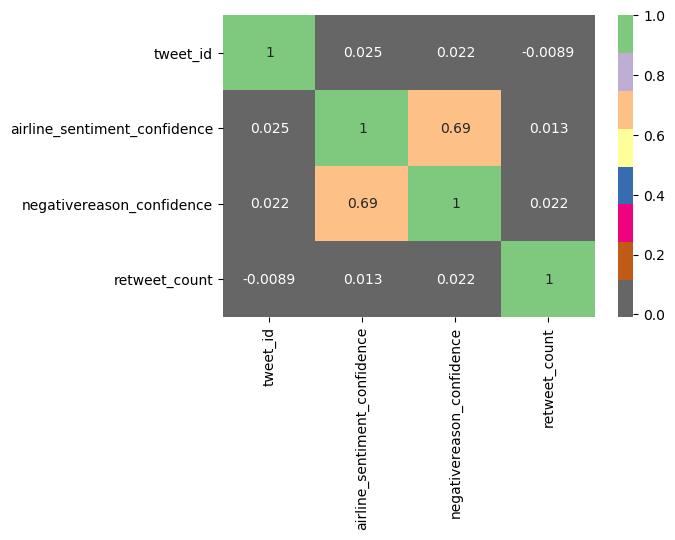

In [ ]:
plt.figure(dpi = 100)
sns.heatmap(tweet_df.corr(), cmap='Accent_r', annot=True)

## <u>PAIRPLOT</u>

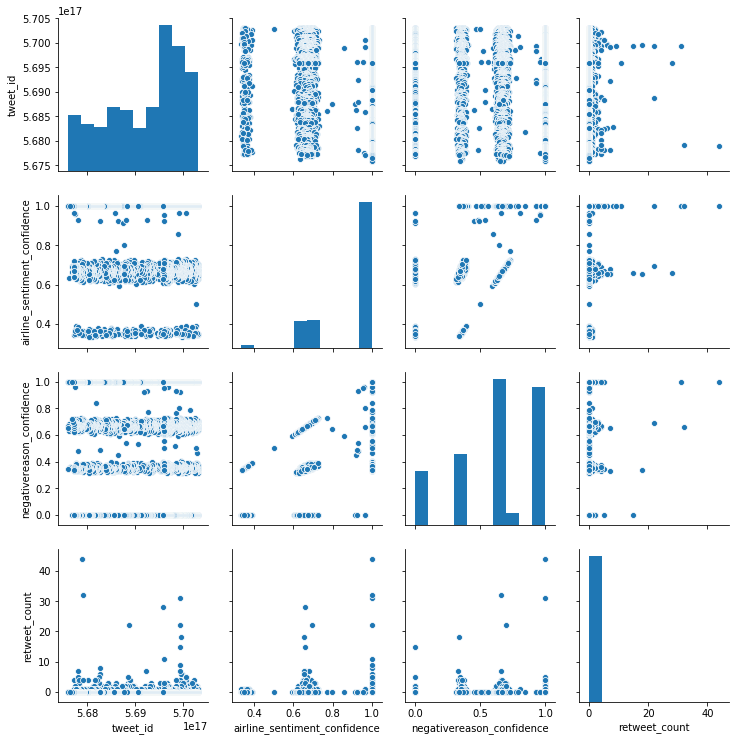

In [ ]:
sns.pairplot(tweet_df)

## <u>HEATMAP</u>

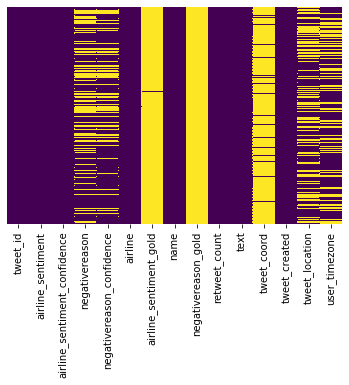

In [ ]:
sns.heatmap(tweet_df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

# <u>TEXT CLEANING</u>

In [ ]:
import nltk

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stopwords_list = stopwords.words('English')

In [ ]:
clean_messages = []

for i in range(tweet_df.shape[0]):
    clean_text = ''
    current_text = word_tokenize(tweet_df['text'].values[i])
    for word in current_text:
        if word == '@' or word == 'VirginAmerica' or word == 'United' or word == 'SouthwestAir' or word == 'USAirways' or word == 'americanair' or word == 'AmericanAir' or word == 'jetblue' or word == 'delta' or word == 'Delta':
            continue
        if not word in stopwords_list:
            clean_text = clean_text + ' ' + word
        
    clean_messages.append(clean_text)

In [ ]:
tweet_df['clean_text']=clean_messages

In [ ]:
tweet_df['clean_text']=tweet_df['clean_text'].apply(lambda x:" ".join(word.lower() for word in x.split()))

In [ ]:
tweet_df['clean_text']=tweet_df['clean_text'].str.replace('[^\w\s]','')

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
#nltk.download('wordnet')

In [ ]:
wordnet = WordNetLemmatizer()

In [ ]:
tweet_df['clean_text']=tweet_df['clean_text'].apply(lambda x:' '.join(wordnet.lemmatize(word) for word in x.split()))

In [ ]:
tweet_df[['text','clean_text']]

,text,clean_text
0,@VirginAmerica What @dhepburn said.,what dhepburn said
1,@VirginAmerica plus you've added commercials t...,plus ve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,i nt today must mean i need take another trip
3,@VirginAmerica it's really aggressive to blast...,s really aggressive blast obnoxious entertainm...
4,@VirginAmerica and it's a really big bad thing...,s really big bad thing
...,...,...
14635,@AmericanAir thank you we got on a different f...,thank got different flight chicago
14636,@AmericanAir leaving over 20 minutes Late Flig...,leaving 20 minute late flight no warning commu...
14637,@AmericanAir Please bring American Airlines to...,please bring american airline blackberry10
14638,"@AmericanAir you have my money, you change my ...",money change flight nt answer phone any sugges...


**TEXT DATA IS CLEAN**

In [ ]:
tweet_df1=tweet_df[['tweet_id','airline_sentiment','airline_sentiment_confidence','airline','clean_text']]

# QUESTIONS AND ANSWERS

## 1.What are the most common words used by people who have taken the airline 'United'? 

In [ ]:
airline_df=tweet_df.loc[(tweet_df['airline']=='United')]

In [ ]:
import re
list1=[]
for i in airline_df['text']:
     list1.append(re.sub(r"[\d,@\'?\.$%_!#^&*)(-+=:;,./?|]", "", i, flags=re.I))
s1=''.join(list1)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
AI_tokens=word_tokenize(s1)
char_list=['http','lol','-','÷','[',']','#']
AI_tokens= [ele for ele in AI_tokens if all(ch not in ele for ch in char_list)]

from nltk.probability import FreqDist
fdist=FreqDist()
for word in AI_tokens:
    fdist[word.lower()]+=1
print(fdist)
fdist1=fdist.most_common(1)
fdist1

<FreqDist with 7163 samples and 64061 outcomes>


[('to', 2240)]

## 2.What is the most common usertimezone who have taken the airine 'USAirways'?

In [ ]:
usertimezone_df=tweet_df.loc[(tweet_df['airline']=='Virgin America')]

In [ ]:
from nltk.probability import FreqDist
fdist=FreqDist()
for i in usertimezone_df['user_timezone']:
    fdist[i]+=1

In [ ]:
fdist1=fdist.most_common(1)

In [ ]:
fdist1

[('Pacific Time (US & Canada)', 126)]

# <u>EXPLORATORY DATA ANALYSIS</u>

## Distribution plots for all numberical variables

**a. Matplotlib Histograms:**

Text(0.5, 1.0, 'tweet_id:')

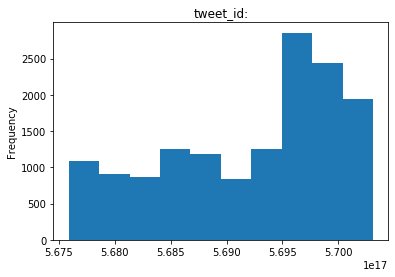

Text(0.5, 1.0, 'airline_sentiment_confidence:')

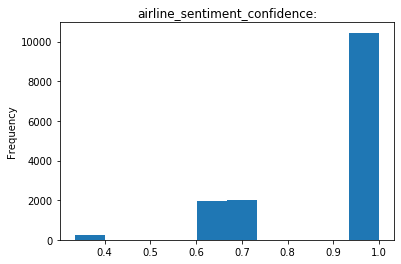

In [ ]:
for i in ['tweet_id','airline_sentiment_confidence']:
    plt.title(i+":")
    tweet_df[i].plot(kind='hist')
    plt.show()

**b. Seaborn Distribution and Box Plots:**

Text(0.5, 1.0, 'tweet_id :')

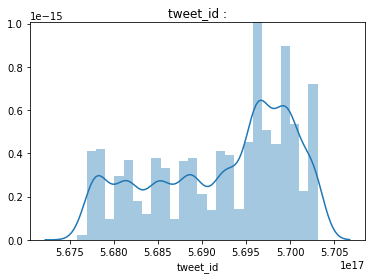

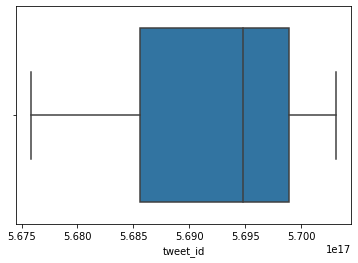

Text(0.5, 1.0, 'airline_sentiment_confidence :')

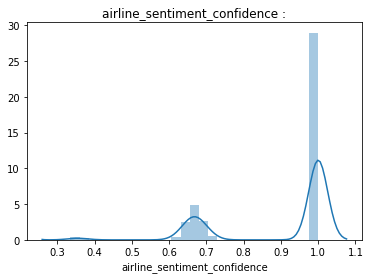

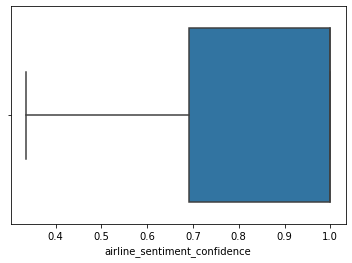

In [ ]:
for i in ['tweet_id','airline_sentiment_confidence']:
    plt.title(i+' :')
    sns.distplot(tweet_df[i])
    plt.show()
    sns.boxplot(tweet_df[i])
    plt.show()
    print('\n\n')

# BAR-CHART AND PIE-CHART FOR CATEGORICAL VARIABLES

## BAR-CHART

Text(0.5, 0, 'airline_sentiment_confidence')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Barchart of airline')

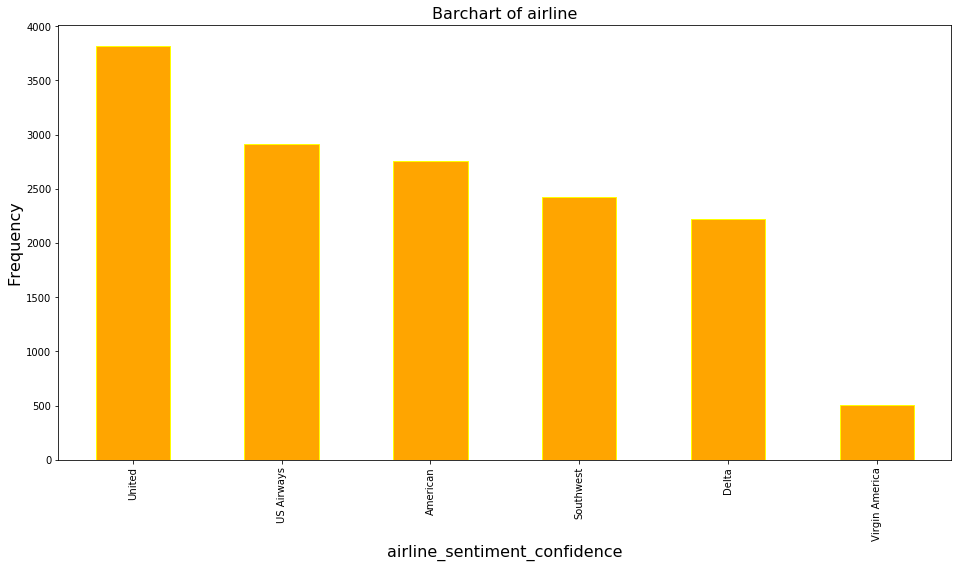

In [ ]:
tweet_df['airline'].value_counts().plot(kind='bar', figsize=[16,8], edgecolor='yellow', color='orange')
plt.xlabel(i, fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Barchart of airline', fontsize=16)
plt.show()

## PIE-CHART

Text(0.5, 1.0, 'Pie-Chart of airline')

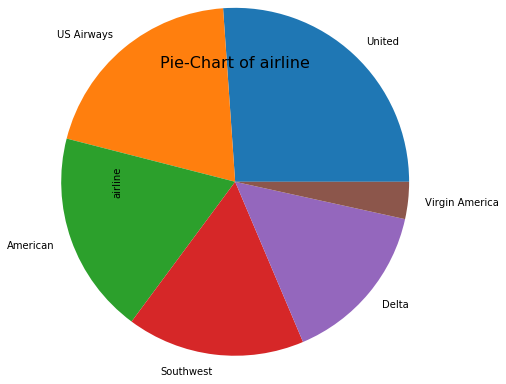

In [ ]:
plt.title('Pie-Chart of airline', fontsize=16)
tweet_df['airline'].value_counts().plot(kind='pie', radius=2)
plt.show()

# LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
tweet_df1['airline']=le.fit_transform(tweet_df1['airline'])

In [ ]:
tweet_df1.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,airline,clean_text
0,570306133677760513,neutral,1.0000,5,what dhepburn said
1,570301130888122368,positive,0.3486,5,plus ve added commercial experience tacky
2,570301083672813571,neutral,0.6837,5,i nt today must mean i need take another trip
3,570301031407624196,negative,1.0000,5,s really aggressive blast obnoxious entertainm...
4,570300817074462722,negative,1.0000,5,s really big bad thing


**LABEL ENCODING 'AIRLINE' COLUMN**

**<u>THE INDEPENDENT VARIABLES ARE</u>: 1.tweet_id 2.airline_sentiment_confidence 3.airline 4.clean_text**

**<u>THE DEPENDENT VARIABLE IS</u>: airline_sentiment**

# <u>TfidfVectorizer and hstack</u>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
vectorizer = TfidfVectorizer(min_df=5)
X_tfidf = vectorizer.fit_transform(tweet_df1['clean_text']) 

**In CountVectorizer we only count the number of times a word appears in the document which results in biasing in favour of most frequent words. this ends up in ignoring rare words which could have helped is in processing our data more efficiently.**

**To overcome this , we use TfidfVectorizer .**

**In TfidfVectorizer we consider overall document weightage of a word. It helps us in dealing with most frequent words. Using it we can penalize them. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents.**

In [ ]:
X=hstack([tweet_df1[['tweet_id','airline_sentiment_confidence','airline']],X_tfidf])

**HERE,WE USE HSTACK TO COMBINE TEXT COLUMN AND OTHER COLUMNS AS OUR INDEPENDENT VARIABLES.**

# <u>MACHINE LEARNING ALGORITHMS</u>

## LOGISTIC REGRESSION 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
Y=tweet_df1['airline_sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
logreg.fit(X_train,Y_train)
y_pred=logreg.predict(X_test)
logreg.score(X_test,Y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.6234972677595628

## SUPPORT VECTOR CLASSIFIER(SVC) 

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,y_pred)

0.6234972677595628

## DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
accuracy_score(Y_test,y_pred)

0.683879781420765

## NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
nb = MultinomialNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, Y_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

0.7655737704918033

## RANDOM FOREST CLASSIFIER 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
accuracy_score(Y_test,y_pred)

0.7655737704918033

# <u>ENSEMBLE MODELLING</u>

## BAGGING 

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bg=BaggingClassifier(RandomForestClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [ ]:
bg.score(X_test,Y_test)

0.7576502732240438

## BOOSTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adb=AdaBoostClassifier(RandomForestClassifier(),n_estimators=5,learning_rate=1)
adb.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [ ]:
adb.score(X_test,Y_test)

0.7756830601092897

# <u>SUMMARY</u>

**RANDOM FOREST ALGORITHM suits the best for the given dataset.**

**BOOSTING has increased its accuracy score a little higher.**

**ENSEMBLE MODELLING is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets.**

**The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.** 

**The motivation for using ensemble models is to reduce the generalization error of the prediction. As long as the base models are diverse and independent, the prediction error of the model decreases when the ensemble approach is used.**

